# Multilabel test

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import f1_score, multilabel_confusion_matrix, plot_confusion_matrix
from sklearn.svm import LinearSVC, SVC

In [2]:
corpus = pd.read_csv("../corpora/german_modern_poems_epochyear.csv")

### Multilabel classes

In [3]:
def multilabel_col(cols):
    if cols[0] != cols[1]:
        return cols[0] + "," + cols[1]
    else:
        return cols[0]
cols = ["epoch_year", "epoch_poet"]
corpus["epochs"] = corpus[cols].apply(lambda row: multilabel_col(list(row.values)), axis=1) 

In [4]:
corpus.head(1)

,pid,filename,poet,title,year,poem,poemlength,epoch_year,epoch_poet,epochs
0,40536,"Hofmannsthal, Hugo von_UNTITLED_1913","Hofmannsthal, Hugo von",UNTITLED,1913,Tüchtigen stellt das schnelle Glück Hoch empor...,116,Expressionismus,Jahrhundertwende,"Expressionismus,Jahrhundertwende"


In [5]:
y = []
for index, row in corpus[["epochs"]].iterrows():
    y.append(set(row['epochs'].split(',')))
    
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(y)
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(corpus["poem"])

In [7]:
def reverse_diag(arr):
    narr = arr.copy()
    """
    row,col = np.diag_indices(narr.shape[0])
    narr[row,col] = np.array(np.diag(narr)[::-1])
    """
    np.fill_diagonal(narr, list(narr.diagonal())[::-1])
    return narr

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.2,
                                                    shuffle=True)


clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average="macro")
print(f"F1-Score: {np.around(f1, decimals=3)}")

F1-Score: 0.669


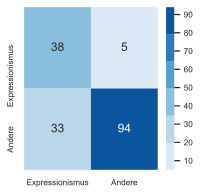

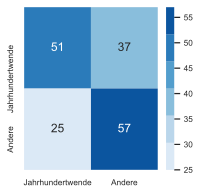

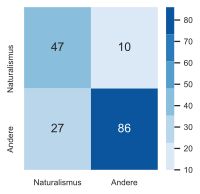

In [30]:
confusion = multilabel_confusion_matrix(y_test, y_pred)
cm_labels = {0: "Expressionismus", 1: "Jahrhundertwende", 2: "Naturalismus"}
for idx, m in enumerate(confusion):
    df_cm = pd.DataFrame(reverse_diag(m), 
                         index=[cm_labels[idx], "Andere"], 
                         columns=[cm_labels[idx], "Andere"])#range(2), range(2))
    plt.figure(figsize=(3,3))
    sns.set(font_scale=0.75) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap=sns.color_palette("Blues"))

    plt.show()

Expressionismus / Jahrhundertwende / Naturalismus

- [1,0,0]: Expressionismus
- [0,1,0]: Jahrhundertwende
- [0,0,1]: Naturalismus
- [1,1,0]: Expressionismus, Jahrhundertwende
- [1,0,1]: Expressionismus, Naturalismus
- [0,1,1]: Jahrhundertwende, Naturalismus
- [1,1,1]: Expressionismus, Jahrhundertwende, Naturalismus

In [244]:
a = np.array([[0, 1, 1], [2, 3, 3], [0, 0, 1]])
a

array([[0, 1, 1],
       [2, 3, 3],
       [0, 0, 1]])

In [242]:
np.fill_diagonal(a, list(a.diagonal())[::-1])

In [243]:
a

array([[1, 1, 1],
       [2, 3, 3],
       [0, 0, 0]])

In [246]:
b = reverse_diag(a)
b

array([[1, 1, 1],
       [2, 3, 3],
       [0, 0, 0]])

In [224]:
a

array([[3, 1],
       [2, 0]])

In [236]:
np.fill_diagonal(a, np.diag(a)[::-1])
c

In [221]:
np.diag(a)[::-1]

array([3, 0])

In [149]:
y_test = np.array([[1,0,0], [1,1,0],[0,1,0]])
y_pred = np.array([[0,1,1], [1,0,1],[1,1,1]])
confusion = multilabel_confusion_matrix(y_test, y_pred)
confusion2 = []
for c in confusion:
    print(c)
    print(np.flip(c))
    print("\n")
    confusion2.append(np.flip(c))

[[0 1]
 [1 1]]
[[1 1]
 [1 0]]


[[0 1]
 [1 1]]
[[1 1]
 [1 0]]


[[0 3]
 [0 0]]
[[0 0]
 [3 0]]




In [152]:
confusion

array([[[0, 1],
        [1, 1]],

       [[0, 1],
        [1, 1]],

       [[0, 3],
        [0, 0]]])

In [151]:
np.array(confusion2)

array([[[1, 1],
        [1, 0]],

       [[1, 1],
        [1, 0]],

       [[0, 0],
        [3, 0]]])

In [144]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = np.array([[1,0,1], [1,1,0],[0,1,0]])
y_pred = np.array([[0,0,1], [0,0,1],[1,0,1]])

labels = ["A", "B", "C"]

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)
    print(matrix.T)

Confusion matrix for label A:
[[0 1]
 [2 0]]
[[0 2]
 [1 0]]
Confusion matrix for label B:
[[1 0]
 [2 0]]
[[1 2]
 [0 0]]
Confusion matrix for label C:
[[0 2]
 [0 1]]
[[0 0]
 [2 1]]


In [97]:
confusion = multilabel_confusion_matrix(y_test, y_pred, labels=["Naturalismus", "Jahrhundertwende", "Expressionismus"])
#cnf_df = pd.DataFrame(confusion)#, index=classes, columns=classes)
#plt.figure(figsize=(11,11))
#sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))

/Users/jan/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: cannot perform reduce with flexible type

In [96]:
confusion

array([[[96,  9],
        [24, 41]],

       [[57, 25],
        [31, 57]],

       [[82, 15],
        [28, 45]]])

In [ ]:
subclf = SVC(kernel="linear")
lsvm = OneVsOneClassifier(estimator=subclf)
clf = lsvm.fit(X_train, y_train)
lsvm_scores = cross_val_score(lsvm, X_train, y_train, cv=10, scoring="f1_macro")
svm_mean = np.mean(lsvm_scores)

print(f"Cross Validation: {np.around(svm_mean, decimals=3)}")

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average="macro")
print(f"F1-Score: {np.around(f1, decimals=3)}")